In [36]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sp
import scipy.optimize

%matplotlib inline

In [29]:
length = 201
diff_rate = 1
def get step:
    return np.random.rand(1)*2-1
particles = 1000
time = 2000

bar = np.zeros(length)

particles_paths = []

for _ in range(particles):
    track = [(length-1)/2]
    for _ in range(time):
        if track[-1] == 0:
            track.append(1)
        elif track[-1] == length-1:
            track.append(length-2)
        else:
            track.append(track[-1] + np.random.choice(diff_steps))
    particles_paths.append(track)

(0, 40)

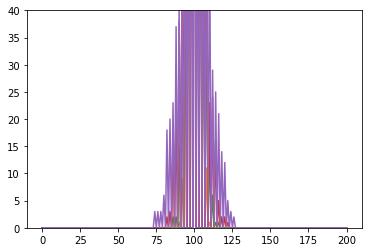

In [30]:
time_pos = {}
useful = []
for t in range(time):
    time_pos[t] = [route[t] for route in particles_paths]
    useful.append([time_pos[t].count(i) for i in range(length)])


for t in [0, 10, 20, 40, 80]:
    plt.plot(range(length), useful[t])
    
plt.ylim(0, 40)

In [6]:
size = 11

adj_mat = np.zeros((size,size))

for i in range(size-1):
    adj_mat[i, i+1] = 1
    adj_mat[i+1, i] = 1

adj_mat

array([[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.]])

In [5]:
def time_track_ensemble(start, trials, connect_mat, time):
    # returns a list of the exit stations of an ensemble of walkers, all at the same starting point.

    visited = []

    for i in range(trials):

        next_loc = start
        track = []


        for t in range(time):

            location = int(next_loc)

            next_loc = np.random.choice(np.nonzero(connect_mat[location])[0])

            track.append(location)

        visited.append(track)

    return visited

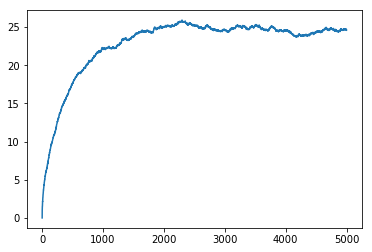

In [30]:
size = 101
max_time = 5000

adj_mat = np.zeros((size,size))

for i in range(size-1):
    adj_mat[i, i+1] = 1
    adj_mat[i+1, i] = 1

adj_mat

mid = (size-1)/2

results = time_track_ensemble(mid, 1000, adj_mat, max_time)
dists = {}

for i in range(len(results[0])):
    paths = [path[i] for path in results]
    dists[i] = np.mean([np.abs(pos-mid) for pos in paths])
    
plt.plot(list(dists.keys()),list(dists.values()))

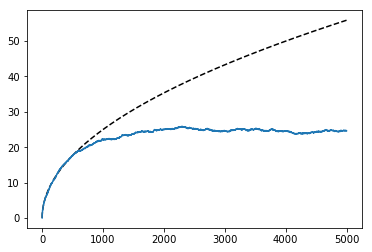

In [41]:
max_time = 5000

def func(x, a):
    return a * np.sqrt(x)

popt, pcov = sp.optimize.curve_fit(func, range(0, max_time)[0:500], list(dists.values())[0:500])

plt.plot(np.array(range(0, max_time)), func(np.array(range(0, max_time)), *popt), '--', c='k')

plt.plot(list(dists.keys()),list(dists.values()))

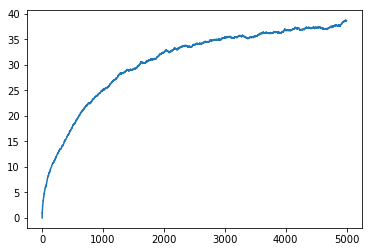

In [42]:
size = 151
max_time = 5000

adj_mat = np.zeros((size,size))

for i in range(size-1):
    adj_mat[i, i+1] = 1
    adj_mat[i+1, i] = 1

adj_mat

mid = (size-1)/2

results = time_track_ensemble(mid, 1000, adj_mat, max_time)
dists2 = {}

for i in range(len(results[0])):
    paths = [path[i] for path in results]
    dists2[i] = np.mean([np.abs(pos-mid) for pos in paths])
    
plt.plot(list(dists2.keys()),list(dists2.values()))

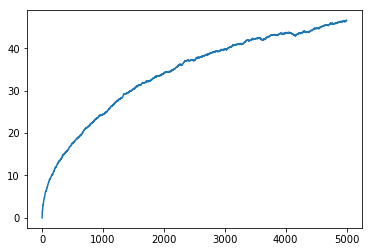

In [43]:
size = 201
max_time = 5000

adj_mat = np.zeros((size,size))

for i in range(size-1):
    adj_mat[i, i+1] = 1
    adj_mat[i+1, i] = 1

adj_mat

mid = (size-1)/2

results = time_track_ensemble(mid, 1000, adj_mat, max_time)
dists3 = {}

for i in range(len(results[0])):
    paths = [path[i] for path in results]
    dists3[i] = np.mean([np.abs(pos-mid) for pos in paths])
    
plt.plot(list(dists3.keys()),list(dists3.values()))

101
151
201


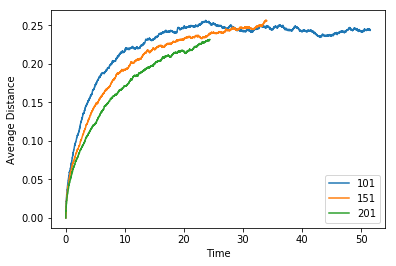

In [76]:
max_time = 5000

def func(x, a):
    return a * np.sqrt(x)

# popt, pcov = sp.optimize.curve_fit(func, range(0, max_time)[0:500], list(dists.values())[0:500])

# plt.plot(np.array(range(0, max_time)), func(np.array(range(0, max_time)), *popt), '--', c='b')

# plt.plot(list(dists.keys()),list(dists.values()), c='b', label='101')

# popt, pcov = sp.optimize.curve_fit(func, range(0, max_time)[0:500], list(dists2.values())[0:500])

# plt.plot(np.array(range(0, max_time)), func(np.array(range(0, max_time)), *popt), '--', c='g')

# plt.plot(list(dists2.keys()),list(dists2.values()), c='g', label='151')

# plt.plot(list(dists3.keys()),list(dists3.values()), c='r', label='201')


for dist, lent in zip([dists, dists2, dists3], [101, 151, 201]):
    print(lent)
    plt.plot(np.array(list(dist.keys()))/(lent^4),np.array(list(dist.values()))/(lent), label=lent)

#popt, pcov = sp.optimize.curve_fit(func, range(0, max_time)[0:500], list(dists3.values())[0:500])

#plt.plot(np.array(range(0, max_time)), func(np.array(range(0, max_time)), *popt), '--', c='k', label=('y ={:.2f}x^0.5  ({:.2f}e-6)'.format(*popt, 1000000*pcov[0][0])))

plt.legend(loc=4)

plt.xlabel('Time')
plt.ylabel('Average Distance')

#plt.savefig('limlinedifscale.png', dpi=1000)